tran tes split scale işlemi 

<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PowerTransformer
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso, LassoCV,ElasticNetCV,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)

# Data Gathering

In [2]:
df=pd.read_csv("car_dataset.csv")

In [3]:
df.sample(13)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
147,Yamaha FZ S V 2.0,2015,0.55,0.84,58000,Petrol,Individual,Manual,0
16,ertiga,2015,7.25,10.79,41678,Diesel,Dealer,Manual,0
13,ertiga,2015,6.10,7.71,26000,Petrol,Dealer,Manual,0
105,KTM RC390,2015,1.35,2.37,21700,Petrol,Individual,Manual,0
215,verna,2012,4.50,9.40,36100,Petrol,Dealer,Manual,0
237,creta,2015,11.25,13.60,68000,Diesel,Dealer,Manual,0
232,elantra,2015,11.45,14.79,12900,Petrol,Dealer,Automatic,0
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
118,Royal Enfield Classic 350,2015,1.10,1.47,26000,Petrol,Individual,Manual,0
199,Honda CB Shine,2007,0.12,0.58,53000,Petrol,Individual,Manual,0


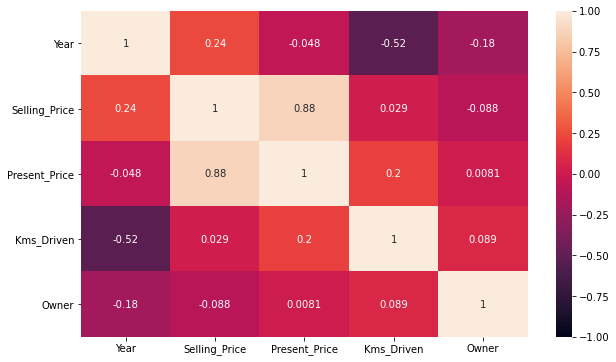

In [4]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1); #present price etkisi çok düşük

In [5]:
df.describe(include="object")

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Data Preparation

In [8]:
df = df.drop(["Car_Name","Present_Price"],axis=1)

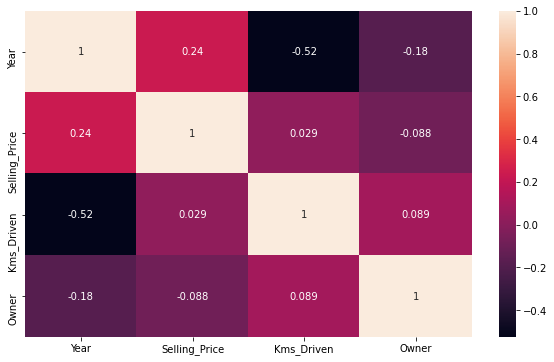

In [9]:
sns.heatmap(df.corr(),annot=True);

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [10]:
df["Fuel_Type_Petrol"]=[1 if i =="Petrol" else 0 for i in df.Fuel_Type ]

In [11]:
df["Fuel_type_diesel"]=[1 if i =="Diesel" else 0 for i in df.Fuel_Type ]

In [12]:
df["Transmission_Manual"]=[1 if i =="Manual" else 0 for i in df.Transmission ]

In [13]:
df["Seller_Type_Individual"]=[1 if i =="Individual" else 0 for i in df.Seller_Type ]

In [14]:
df = df.drop(columns=["Fuel_Type","Seller_Type","Transmission"])

In [15]:
df.sample(7)

,Year,Selling_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Fuel_type_diesel,Transmission_Manual,Seller_Type_Individual
129,2017,0.78,5000,0,1,0,1,1
297,2015,4.00,60000,0,1,0,1,0
237,2015,11.25,68000,0,0,1,1,0
193,2013,0.20,24000,1,1,0,1,1
8,2016,8.75,20273,0,0,1,1,0
218,2014,6.45,45078,0,1,0,1,0
27,2017,6.00,16200,0,1,0,1,1


### Features and target variable

In [16]:
X = df.drop(columns="Selling_Price")
y = df["Selling_Price"]

### Splitting data into training and testing

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
X_train.shape

(210, 7)

##  Model Building (Linear Regression)

In [19]:
model=LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [23]:
eval_metric(y_test, y_pred)   #test score ları 

Model testing performance:
--------------------------
R2_score 	: 0.6394296758946413
MAE 		: 2.084409136592481
MSE 		: 10.266951731641837
RMSE 		: 3.2042084407294475


In [24]:
y_train_pred = model.predict(X_train)

In [25]:
eval_metric(y_train, y_train_pred) # train sonucları 

Model testing performance:
--------------------------
R2_score 	: 0.5454986649935094
MAE 		: 1.9842165070621371
MSE 		: 11.154660909027575
RMSE 		: 3.3398594145603755


# Regularization

# Ridge

In [26]:
model_ridge =Ridge()

In [27]:
model_ridge.fit(X_train,y_train)

Ridge()

In [28]:
y_pred = model_ridge.predict(X_test)

In [29]:
y_train_pred = model.predict(X_train)

In [30]:
eval_metric(y_test,y_pred) #test sonuçları

Model testing performance:
--------------------------
R2_score 	: 0.6370999392175279
MAE 		: 2.076902005160637
MSE 		: 10.333289121083707
RMSE 		: 3.2145433767618856


In [31]:
eval_metric(y_train,y_train_pred) #train sonuçları

Model testing performance:
--------------------------
R2_score 	: 0.5454986649935094
MAE 		: 1.9842165070621371
MSE 		: 11.154660909027575
RMSE 		: 3.3398594145603755


##  👇 RİdgeCV ile bakalım

In [32]:
from sklearn.metrics import SCORERS
list(SCORERS)

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [33]:
model_ridge_cv = RidgeCV(alphas=np.linspace(0.01,1,100),scoring="neg_root_mean_squared_error",cv=10)

In [34]:
model_ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [35]:
model_ridge_cv.alpha_

0.27

In [36]:
y_pred=model_ridge_cv.predict(X_test)

In [37]:
y_train_pred=model_ridge_cv.predict(X_train)

In [38]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6390018947381914
MAE 		: 2.081287614444808
MSE 		: 10.279132458094782
RMSE 		: 3.20610861607881


In [39]:
eval_metric(y_train,y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.5452135551336956
MAE 		: 1.9871301234994088
MSE 		: 11.161658256588717
RMSE 		: 3.3409068015418684


# Lasso

In [40]:
lasso_cv_model= LassoCV(alphas=np.linspace(0.01,1,100),max_iter=100000,cv=10)

In [41]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [42]:
y_pred = lasso_cv_model.predict(X_test)

In [43]:
y_train_pred = lasso_cv_model.predict(X_train)

In [44]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6369882982616382
MAE 		: 2.0712927801355043
MSE 		: 10.336468008054615
RMSE 		: 3.2150377926324


In [45]:
eval_metric(y_train,y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.5443605582656197
MAE 		: 1.9831015394435336
MSE 		: 11.182593048385785
RMSE 		: 3.3440384340473397


## Elastic-Net 

In [46]:
elastic_cv_model = ElasticNetCV(alphas = np.linspace(0.01,1,100), l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [47]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [48]:
y_pred = lasso_cv_model.predict(X_test)

In [49]:
elastic_cv_model.alpha_

0.02

In [50]:
elastic_cv_model.l1_ratio_

1.0

In [51]:
elastic_cv_model.coef_

array([ 2.57095060e-01, -1.69554405e-06, -0.00000000e+00, -0.00000000e+00,
        5.07664543e+00, -3.82727895e+00, -3.89443467e+00])

In [52]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.5443605582656197
MAE 		: 1.9831015394435336
MSE 		: 11.182593048385785
RMSE 		: 3.3440384340473397


In [53]:
y_pred = elastic_cv_model.predict(X_test)
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6369882982616382
MAE 		: 2.0712927801355043
MSE 		: 10.336468008054615
RMSE 		: 3.2150377926324


In [54]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,3.344038,3.215038
mae,1.983102,2.071293
mse,11.182593,10.336468
R2,0.544361,0.636988


In [55]:
rmse_vals =[]
r2_train = []
r2_vals =[]
model_names =[]

lr = LinearRegression()
rr = Ridge()
elastic= ElasticNet()
lassor = Lasso()

models = [lr,rr,lassor,elastic]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_vals.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_train.append (model.score(X_train,y_train))
    r2_vals.append(r2_score(y_test, y_pred))

    
model_names = ['LinearRegression','Ridge','Lasso','ElasticNet']
result_df = pd.DataFrame({'RMSE':rmse_vals,'R2_Train':r2_train, 'R2_Test':r2_vals}, index=model_names)
result_df


,RMSE,R2_Train,R2_Test
LinearRegression,3.204208,0.545499,0.639430
Ridge,3.214543,0.543809,0.637100
Lasso,4.884952,0.146254,0.161952
ElasticNet,4.655326,0.233637,0.238888
